### Preparacion Prueba Solemne 2 Inteligencia Artificial :
 ## Ejercicios de PCA

### Imports


In [2]:
#Estudio para prueba de inteligencia artificial
#PCA

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Ejemplo 1 de PCA 

### Datos

In [28]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data

In [29]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [31]:
datos.shape

(50, 4)

In [32]:
datos.head(4)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5


### Exploracion

Los dos principales aspectos a tener en cuenta cuando se quiere realizar un PCA es identificar el valor promedio y dispersión de las variables.

La media de las variables muestra que hay tres veces más secuestros que asesinatos y 8 veces más asaltos que secuestros.

Source : "https://www.cienciadedatos.net/documentos/py19-pca-python.html"

In [40]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
datos.mean(axis=0)

----------------------
Media de cada variable
----------------------


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [42]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, la variable Assault, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales.

### PCA


La clase sklearn.decomposition.PCA incorpora las principales funcionalidades que se necesitan a la hora de trabajar con modelos PCA. El argumento n_components determina el número de componentes calculados. Si se indica None, se calculan todas las posibles (min(filas, columnas) - 1).

Por defecto, PCA() centra los valores pero no los escala. Esto es importante ya que, si las variables tienen distinta dispersión, como en este caso, es necesario escalarlas. Una forma de hacerlo es combinar un StandardScaler() y un PCA() dentro de un pipeline. Para más información sobre el uso de pipelines

In [43]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

### Interpretacion

Una vez entrenado el objeto PCA, pude accederse a toda la información de las componentes creadas.

components_ contiene el valor de los loadings  𝜙  que definen cada componente (eigenvector). 

Las filas se corresponden con las componentes principals (ordenadas de mayor a menor varianza explicada). 

Las filas se corresponden con las variables de entrada.

In [44]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,0.649228,-0.743407,0.133878,0.089024


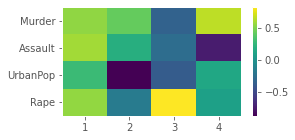

In [45]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada. 

Esta información está almacenada en los atributos explained_variance_ y explained_variance_ratio_ del modelo.

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.62006039 0.24744129 0.0891408  0.04335752]


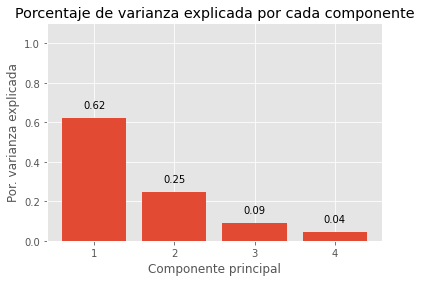

In [47]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, la primera componente explica el 62% de la varianza observada en los datos y la segunda el 24.7%. Las dos últimas componentes no superan por separado el 1% de varianza explicada.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.62006039 0.86750168 0.95664248 1.        ]


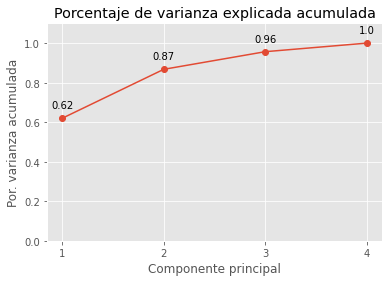

In [56]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

### Transformacion

Una vez entrenado el modelo, con el método transform() se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

In [63]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = datos.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


La transformación es el resultado de multiplicar los vectores que definen cada componente con el valor de las variables. Puede calcularse de forma manual:

In [66]:
proyecciones = np.dot(modelo_pca.components_, scale(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


### Reconstrucción

In [71]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = datos.columns,
                    index   = datos.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(datos.head())

------------------
Valores originales
------------------


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236.0,58.0,21.2
Alaska,10.0,263.0,48.0,44.5
Arizona,8.1,294.0,80.0,31.0
Arkansas,8.8,190.0,50.0,19.5
California,9.0,276.0,91.0,40.6


---------------------
Valores reconstruidos
---------------------


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Ejemplo 2 de PCA 

In [156]:
pokemon = pd.read_csv("datasets/pokemon.csv")


In [157]:
datapokemon = pokemon.set_index('Name')

In [158]:
datapokemon.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


In [159]:
datapokemon.drop(['Legendary','Generation','#','Type 1','Type 2','Total'],axis=1,inplace=True)

In [160]:
datapokemon.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,
Bulbasaur,45,49,49,65,65,45
Ivysaur,60,62,63,80,80,60
Venusaur,80,82,83,100,100,80
VenusaurMega Venusaur,80,100,123,122,120,80
Charmander,39,52,43,60,50,65


In [161]:
datapokemon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, Bulbasaur to Volcanion
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   HP       800 non-null    int64
 1   Attack   800 non-null    int64
 2   Defense  800 non-null    int64
 3   Sp. Atk  800 non-null    int64
 4   Sp. Def  800 non-null    int64
 5   Speed    800 non-null    int64
dtypes: int64(6)
memory usage: 43.8+ KB


In [162]:
datapokemon.shape

(800, 6)

## Exploracion

In [163]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
datapokemon.mean(axis=0)

----------------------
Media de cada variable
----------------------


HP         69.25875
Attack     79.00125
Defense    73.84250
Sp. Atk    72.82000
Sp. Def    71.90250
Speed      68.27750
dtype: float64

In [164]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datapokemon.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


HP          652.019323
Attack     1053.480599
Defense     972.410707
Sp. Atk    1070.748536
Sp. Def     774.448554
Speed       844.511133
dtype: float64

### PCA

In [165]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datapokemon)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

### Interpretacion

In [166]:
datapokemon.columns

Index(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')

In [168]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datapokemon.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6']
)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
PC1,0.389886,0.439254,0.363747,0.457162,0.448570,0.335440
PC2,0.084835,-0.011825,0.628789,-0.305414,0.239097,-0.668463
PC3,-0.471926,-0.594153,0.069339,0.305612,0.565594,0.078513
PC4,0.717691,-0.405836,-0.419237,0.147517,0.185445,-0.297163
PC5,0.219991,-0.190255,0.059032,-0.735345,0.300200,0.530161
PC6,0.233669,-0.502990,0.536899,0.204530,-0.545171,0.255140


Analisis , se ve que en el primer componente la variable con mas peso es el ataque especial , en el segundo componente es la velocidad , en el tercero el ataque , en el cuarto la salud etc

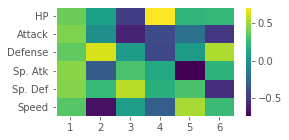

In [170]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datapokemon.columns)), datapokemon.columns)
plt.xticks(range(len(datapokemon.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.45190665 0.18225358 0.12979086 0.12011089 0.07142337 0.04451466]


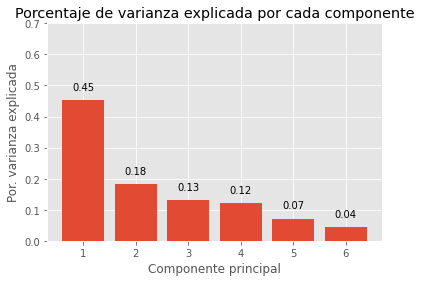

In [172]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datapokemon.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 0.7)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, la primera componente explica el 45% de la varianza observada en los datos , la segunda el 18% , la tercera el 13% y la cuarta un 12% . Las dos últimas componentes no superan por separado el 1% de varianza explicada.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.45190665 0.63416023 0.76395109 0.88406197 0.95548534 1.        ]


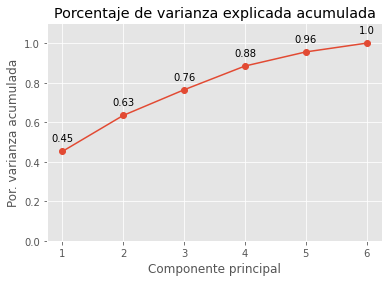

In [173]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datapokemon.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datapokemon.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

### Transformacion


In [176]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=datapokemon)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6'],
    index   = datapokemon.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6
Name,,,,,,
Bulbasaur,-1.556375,-0.021482,0.666504,0.184176,-0.403807,-0.303004
Ivysaur,-0.362867,-0.050269,0.667913,0.269254,-0.225788,-0.194487
Venusaur,1.280152,-0.062720,0.623914,0.331391,-0.001545,-0.068177
VenusaurMega Venusaur,2.620916,0.704263,0.995538,-0.199321,-0.310170,0.087380
Charmander,-1.758284,-0.706179,0.411454,-0.268602,-0.168877,-0.069368


### Reconstruccion

In [177]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = datapokemon.columns,
                    index   = datapokemon.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(datapokemon.head())

------------------
Valores originales
------------------


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,
Bulbasaur,45.0,49.0,49.0,65.0,65.0,45.0
Ivysaur,60.0,62.0,63.0,80.0,80.0,60.0
Venusaur,80.0,82.0,83.0,100.0,100.0,80.0
VenusaurMega Venusaur,80.0,100.0,123.0,122.0,120.0,80.0
Charmander,39.0,52.0,43.0,60.0,50.0,65.0


---------------------
Valores reconstruidos
---------------------


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,
Bulbasaur,45,49,49,65,65,45
Ivysaur,60,62,63,80,80,60
Venusaur,80,82,83,100,100,80
VenusaurMega Venusaur,80,100,123,122,120,80
Charmander,39,52,43,60,50,65


### Ejemplo 3 de pca : de profesor

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import  load_breast_cancer
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()


data = pd.DataFrame(data.data, columns=data.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
data.shape

(569, 30)

In [5]:
std = StandardScaler()
ndata = std.fit_transform(data.values)

In [12]:
cov = np.cov(ndata.T)
valores_propios, vectores_propios = np.linalg.eig(cov)
valores_propios.shape, vectores_propios.shape

((30,), (30, 30))

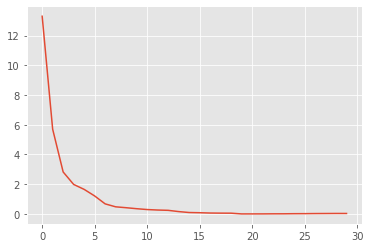

In [7]:
plt.plot(valores_propios)

In [11]:
valores_proios = np.cumsum(valores_propios)
valores_proios /= valores_proios.max()

pred = np.dot(ndata, vectores_propios[:10, :].T)
pred.shape

(569, 10)

In [10]:
names = ['c_{}'.format(i) for i in range(10)]


pd.DataFrame(pred, columns=names)

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9
0,0.150881,-2.076717,1.716164,0.410556,-0.772844,-0.494213,4.254474,1.041186,5.416496,-1.115412
1,1.208085,-1.546898,1.376821,-0.421116,-0.406880,0.378540,2.500769,-0.937054,-0.032630,0.232835
2,0.063683,-2.065330,0.872687,-0.034986,-0.139644,0.516293,2.976107,0.692841,2.391007,-0.085284
3,-3.457734,-2.780065,-0.485935,0.451838,1.311836,-1.133380,-0.294605,2.448251,7.140643,-1.657014
4,1.599180,-1.015615,2.278185,0.700983,-0.286355,-0.592075,2.864804,0.865104,1.242857,-0.768204
...,...,...,...,...,...,...,...,...,...,...
564,1.603976,-1.481563,2.190556,0.902931,-0.242271,-0.346883,4.817063,1.390392,1.987716,0.931437
565,0.521400,-0.442736,0.426739,0.429513,0.990158,0.630268,3.043838,0.006633,0.093925,2.038737
566,-0.174080,-0.469809,0.266965,0.197142,-0.306978,0.832762,1.076622,0.120965,-0.546441,0.894160
567,-1.262534,-2.514697,0.843575,0.755582,1.458454,0.033724,3.645339,1.537782,4.765836,0.000138


In [9]:
valores_propios[9]

0.3513108748817331